## Scraping

### Initials

In [1]:
from datetime import date
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from msedge.selenium_tools import Edge, EdgeOptions

### Driver Loading

In [2]:
options = EdgeOptions()
options.use_chromium = True

prefs = {'profile.default_content_setting_values': {'cookies': 2, 'images': 2, 'javascript': 2, 
                            'plugins': 2, 'popups': 2, 'geolocation': 2, 
                            'notifications': 2, 'auto_select_certificate': 2, 'fullscreen': 2, 
                            'mouselock': 2, 'mixed_script': 2, 'media_stream': 2, 
                            'media_stream_mic': 2, 'media_stream_camera': 2, 'protocol_handlers': 2, 
                            'ppapi_broker': 2, 'automatic_downloads': 2, 'midi_sysex': 2, 
                            'push_messaging': 2, 'ssl_cert_decisions': 2, 'metro_switch_to_desktop': 2, 
                            'protected_media_identifier': 2, 'app_banner': 2, 'site_engagement': 2, 
                            'durable_storage': 2}}
options.add_experimental_option('prefs', prefs)
options.add_argument("start-maximized")
options.add_argument("disable-infobars")
options.add_argument("--disable-extensions")

driver = Edge(options = options)

records = []
records2 = []

driver.get('https://www.olx.co.id')

### Functions

In [3]:
def extract_data(item):
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    try:
        luas_bangunan =  int(soup.find('span', {'data-aut-id': 'value_p_sqr_building'}).text)
    except AttributeError:
        luas_bangunan = '#N/A'            

    try:    
        luas_tanah =  int(soup.find('span', {'data-aut-id': 'value_p_sqr_land'}).text)
    except AttributeError:
        luas_tanah = '#N/A'

    try:
        kamar_tidur = soup.find('span', {'data-aut-id': 'value_p_bedroom'}).text
    except AttributeError:
        kamar_tidur = '#N/A'            

    try:
        kamar_mandi = soup.find('span', {'data-aut-id': 'value_p_bathroom'}).text
    except AttributeError:
        kamar_mandi= '#N/A'

    try:
        lantai = int(soup.find('span', {'data-aut-id': 'value_p_floor'}).text)
    except AttributeError:
        lantai= '#N/A'

    try:
        alamat = soup.find('span', {'data-aut-id': 'value_p_alamat'}).text
    except AttributeError:
        alamat= '#N/A'

    try:
        ID_iklan =  soup.find('strong').text
    except AttributeError:
        ID_iklan= '#N/A'       

    hasil = (luas_bangunan, luas_tanah, kamar_tidur, kamar_mandi,lantai, alamat, ID_iklan)
    return hasil

In [4]:
 def extract_records(item):
            item_title = item.find('span', {'data-aut-id': 'itemTitle'}).text
            price = item.find('span', {'data-aut-id': 'itemPrice'}).text
            item_location = item.find('span', {'data-aut-id': 'item-location'}).text
            date_posted = item.find('span', {'class': 'zLvFQ'}).text
            URL = 'https://www.olx.co.id'+item.a.get('href')
                
            result = (item_title, price, item_location, date_posted, URL )
            return result

In [5]:
def main(pages):
    url = input('masukkan URL: ')
 
    for page in range(1,pages+1):
        driver.get(url + '&page=' + str(page))
  
        #time.sleep(5)  add this line if your computer/internet is slow
        
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        results = soup.find_all('li', {'class':'EIR5N'})
        
        for item in results:
            record = extract_records(item)
            if record:
                records.append(record)   
    
    df_result = pd.DataFrame(records, columns=['Title', 'Harga', 'Lokasi', 'Tanggal Posting', 'URL'])

    driver.get('https://www.olx.co.id')
    
    for url in df_result.URL:
        driver.get(url)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        hasil = extract_data(soup)
        records2.append(hasil)
    
    driver.close()  

### Main Execution

In [6]:
main(1)

masukkan URL: https://www.olx.co.id/pondok-aren_g5000256/dijual-rumah-apartemen_c5158?filter=p_bathroom_eq_min_and_max%2Cp_bedroom_eq_min_and_max%2Cp_certificate_eq_shm-sertifikathakmilik%2Cp_floor_eq_min_and_max%2Cp_sqr_land_between_100_to_400%2Ctype_eq_rumah


In [7]:
len(records)

20

### Save to Excel

In [9]:
df_result = pd.DataFrame(records, columns=['Title', 'Harga', 'Lokasi', 'Tanggal Posting', 'URL'])
df2 = pd.DataFrame(records2, columns=['Luas Bangunan', 'Luas Tanah', 'Kamar Tidur', 'Kamar Mandi', 'Lantai', 'Alamat', 'ID'])
df3 = pd.concat([df_result, df2], axis=1)
df_data = df3[['ID', 'Title', 'Harga', 'Lantai', 'Luas Bangunan', 'Luas Tanah', 'Kamar Tidur', 'Kamar Mandi', 'Lokasi', 'Alamat', 'Tanggal Posting', 'URL'] ]

df_data.head()

today = str( date.today().strftime("%d-%b-%Y"))
df_data.to_excel(r'D:\Judin\LEARN\Python\Web Scrapper\olx_data{}.xlsx'.format(today),index=False)

## --------------------------------------------------------------------------------------------------------------------------------------

## Data Cleaning

### Initials

In [8]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import locale
from locale import atoi, setlocale, LC_NUMERIC, atof, LC_ALL
from dateutil import parser
import time

In [9]:
df = pd.read_excel(r'D:\Judin\LEARN\Python\Web Scrapper\olx_data to be used.xlsx')

df.head(3)

,ID,Title,Harga,Lantai,Luas Bangunan,Luas Tanah,Kamar Tidur,Kamar Mandi,Lokasi,Alamat,Tanggal Posting,URL
0,ID IKLAN 813395733,Dijual Rumah di daerah Bintaro Jaya,Rp 1.800.000.000,1.0,54,117,3,2,"Pondok Aren, Tangerang Selatan Kota","Perumahan PJMI,Jalan Cendrawasih III B-11/03, ...",Kemarin,https://www.olx.co.id/item/dijual-rumah-di-dae...
1,ID IKLAN 805740627,Dijual Rumah baru renov dengan tanah luas dan ...,Rp 2.400.000.000,NaN,100,209,3,2,"Pondok Aren, Tangerang Selatan Kota",Bintaro Jaya Sektor 9,10 Des,https://www.olx.co.id/item/dijual-rumah-baru-r...
2,ID IKLAN 808421964,Jual B.U Rumah Siap Huni Lokasi Strategis Deka...,Rp 999.000.000,1.0,60,101,3,2,"Ciputat, Tangerang Selatan Kota",Griya Aviva,19 Nov,https://www.olx.co.id/item/jual-bu-rumah-siap-...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               600 non-null    object 
 1   Title            600 non-null    object 
 2   Harga            600 non-null    object 
 3   Lantai           563 non-null    float64
 4   Luas Bangunan    600 non-null    int64  
 5   Luas Tanah       600 non-null    int64  
 6   Kamar Tidur      600 non-null    object 
 7   Kamar Mandi      600 non-null    object 
 8   Lokasi           600 non-null    object 
 9   Alamat           590 non-null    object 
 10  Tanggal Posting  600 non-null    object 
 11  URL              600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


### Column Cleansing

#### ID

Remove Duplicates

In [11]:
#check if ID is unique
dupe_id = []

for a in set(df['ID'].unique()):
    if list(df['ID']).count(a) > 1:
        dupe_id.append(a)
        
print(dupe_id)

['ID IKLAN 809652403', 'ID IKLAN 813395733']


In [12]:
df.drop_duplicates(subset = 'ID', keep = 'first', inplace = True)

In [13]:
# Making sure ID is no more duplicated

len(df['ID']) == len(set(df['ID']))

True

Fixing Data Type and Structure

In [14]:
df.ID.replace('ID IKLAN ','', regex=True, inplace=True)
df.dropna(subset=['ID'], inplace=True)
df.ID = df.ID.astype(int)

#### Title

In [15]:
#check if Title is unique
dupe_title = []

for a in set(df['Title'].unique()):
    if list(df['Title']).count(a) > 1:
        dupe_title.append(a)
        
dupe_title

['Jual Rumah Di Anggrek Loka BSD Serpong',
 'Jual Rumah Di De latinos BSD Serpong',
 'Rumah Hommy Dalam Cluster Lingkungan Nyaman di Sektor 9 - sc4185iq',
 'Villa Melati Mas Serpong Dekat BSD Dan Bintaro']

In [16]:
df.drop_duplicates(subset = 'Title', keep = 'first', inplace = True)

In [17]:
# Making sure Title is no more duplicated

len(df['Title']) == len(set(df['Title']))

True

#### Harga

Remove Rp and thousand delimiter

In [18]:
df.Harga.replace('Rp ','', regex=True, inplace=True)
locale.setlocale(LC_ALL,'id_ID' )
def makeint(string):
    return atoi(string)

df['Harga'] = df['Harga'].map(makeint)

Scaling and converting datatype

In [19]:
df['Harga'] = df['Harga']/1000000
df['Harga'] = df['Harga'].astype(int)

#### Kamar Mandi and Kamar Tidur

In [20]:
# Cleaning '>' marks from columns

df['Kamar Tidur'].replace('>','', regex=True, inplace=True)
df['Kamar Mandi'].replace('>','', regex=True, inplace=True)

#### Other Numerical Columns

Change #N/A to 0

In [21]:
df = df.fillna(0)

Change data type to integers

In [22]:
cols = df.columns[3:8]

for columns in cols:
    df[columns] = df[columns].astype(int)

#### Lokasi

Removing City Name

In [23]:
loc_split = df.Lokasi.str.split(', ', n=1, expand=True)

df.drop(columns=['Lokasi'], inplace=True)
df['Lokasi'] = loc_split[0]

#### Alamat

Replace the 0 Value to String

In [26]:
df['Alamat'].replace(0, 'Tidak ada alamat', inplace=True)

#### Tanggal Posting

Problems for Tanggal Posting's column:

1. data marked as 'today' and 'yesterday' for today's and yesterday's posting date
2. data marked as '3 days ago'  for before yesterday's to a week posting date
3. month value is in indonesian language format

In [27]:
df['Tanggal Posting'].unique()

array(['Kemarin', '10 Des', '19 Nov', '29 Nov', 'Hari ini', '19 Des',
       '18 Des', '24 Des', '26 Sep', '9 Nov', '23 Nov',
       '2 hari yang lalu', '3 hari yang lalu', '4 hari yang lalu',
       '5 hari yang lalu', '6 hari yang lalu'], dtype=object)

In [28]:
today = str(date.today())
today = int(today[-2:])
str_today = str(today)

this_month = str(date.today())
this_month = int(this_month[5:7])
month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'Mei', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
this_month = month_dict[this_month]


yesterday = str(date.today() - timedelta(days=1))
yesterday = int(yesterday[-2:])
str_yesterday = str(yesterday)

yes_month = str(date.today() - timedelta(days=1))
yes_month = int(yes_month[5:7])
yes_month = month_dict[yes_month]

hari_ini = str_today + ' ' + this_month
kemarin = str_yesterday + ' ' + yes_month

df['Tanggal Posting'].replace('Hari ini',hari_ini, inplace=True)
df['Tanggal Posting'].replace('Kemarin',kemarin, inplace=True)

In [29]:
def that_day(val):
    if len(val)> 6 :
        back = int(val[:2])
        hari_itu = str(date.today() - timedelta(days=back))
        bulan_itu = int(hari_itu[5:7])
        hari_itu = str(int(hari_itu[-2:]))
        bulan_itu = month_dict[bulan_itu]
        tanggal_itu = hari_itu + ' ' + bulan_itu
        val = tanggal_itu
    else:
        val = val
    return val

def todate(dat):
    dat = parser.parse(dat)
    dat = dat.strftime('%d/%m/%Y')
    return dat

df['Tanggal Posting'] = df['Tanggal Posting'].map(that_day)
df['Tanggal Posting'].replace({'Mei':'May', 'Agt':'Aug', 'Okt':'Oct', 'Des':'Dec'}, regex=True, inplace=True)
df['Tanggal Posting'] = df['Tanggal Posting'].map(todate)

df= df[['ID', 'Title', 'Harga', 'Lantai', 'Luas Bangunan', 'Luas Tanah', 
        'Kamar Tidur', 'Kamar Mandi', 'Lokasi', 'Alamat', 'Tanggal Posting', 'URL']]

In [30]:
df.head(3)

,ID,Title,Harga,Lantai,Luas Bangunan,Luas Tanah,Kamar Tidur,Kamar Mandi,Lokasi,Alamat,Tanggal Posting,URL
0,813395733,Dijual Rumah di daerah Bintaro Jaya,1800,1,54,117,3,2,Pondok Aren,"Perumahan PJMI,Jalan Cendrawasih III B-11/03, ...",20/02/2021,https://www.olx.co.id/item/dijual-rumah-di-dae...
1,805740627,Dijual Rumah baru renov dengan tanah luas dan ...,2400,0,100,209,3,2,Pondok Aren,Bintaro Jaya Sektor 9,10/12/2021,https://www.olx.co.id/item/dijual-rumah-baru-r...
2,808421964,Jual B.U Rumah Siap Huni Lokasi Strategis Deka...,999,1,60,101,3,2,Ciputat,Griya Aviva,19/11/2021,https://www.olx.co.id/item/jual-bu-rumah-siap-...


#### Now data has been cleaned!

### Getting Insight From Data

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Average House Price per District

In [32]:
harga_lokasi = df.groupby(['Lokasi']).mean()['Harga']

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Lokasi')

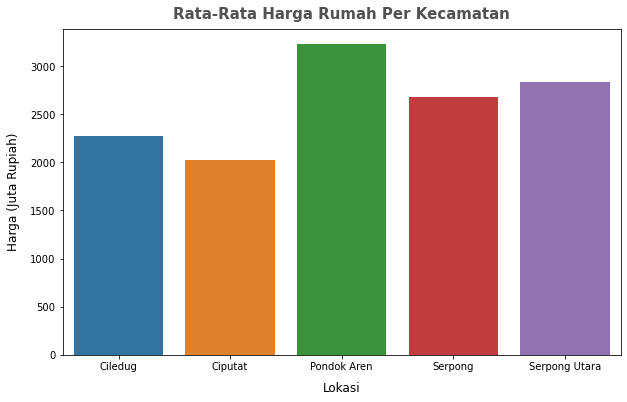

In [33]:
df['Rasio HLT'] = df['Harga']/df['Luas Tanah']

plt.figure(figsize=[10,6])
sns.barplot(harga_lokasi.index, harga_lokasi)
plt.title('Rata-Rata Harga Rumah Per Kecamatan', {'fontsize': 15, 'fontweight':'bold'}, pad=10, color='#515151')
plt.ylabel('Harga (Juta Rupiah)', {'fontsize': 12}, labelpad=10)
plt.xlabel('Lokasi', {'fontsize': 12}, labelpad=10)

# plt.savefig('rata_rata.png', dpi=600, facecolor='white')

#### Number of Listings per District

In [34]:
jumlah_lokasi = df.groupby(['Lokasi']).count()['Harga']

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Lokasi')

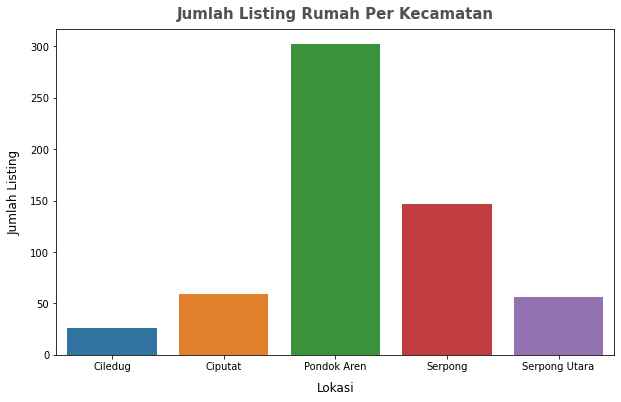

In [35]:
plt.figure(figsize=[10,6])
sns.barplot(jumlah_lokasi.index, jumlah_lokasi)
plt.title('Jumlah Listing Rumah Per Kecamatan', {'fontsize': 15, 'fontweight':'bold'}, pad=10, color='#515151')
plt.ylabel('Jumlah Listing', {'fontsize': 12}, labelpad=10)
plt.xlabel('Lokasi', {'fontsize': 12}, labelpad=10)

# plt.savefig('jumlah_listing.png', dpi=600, facecolor='white')

#### House Price to Land Area Ratio

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


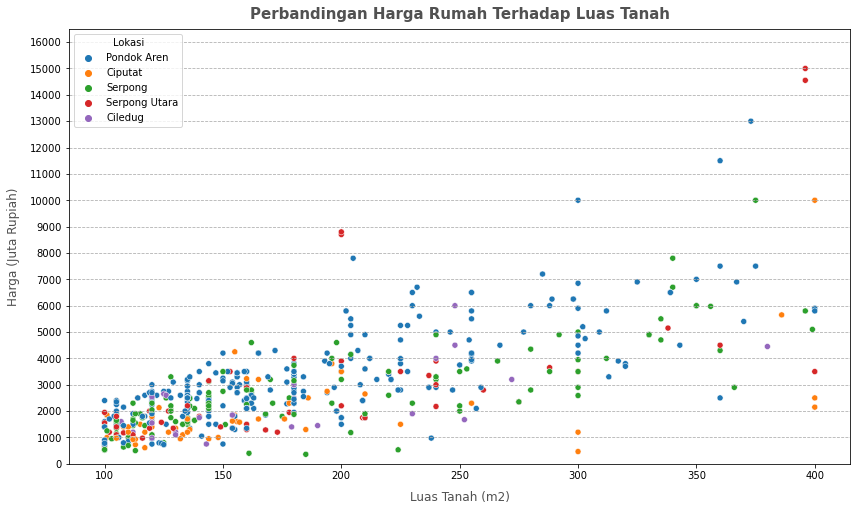

In [36]:
fig = plt.figure(figsize = [14,8])
sns.scatterplot(df['Luas Tanah'], df['Harga'], hue=df['Lokasi'])
plt.title('Perbandingan Harga Rumah Terhadap Luas Tanah', {'fontsize': 15, 'fontweight':'bold'}, pad=10, color='#515151')
plt.ylabel('Harga (Juta Rupiah)', {'fontsize': 12}, labelpad=10, color='#515151')
plt.xlabel('Luas Tanah (m2)', {'fontsize': 12}, labelpad=10, color='#515151')
plt.yticks([x*1000 for x in range(0,17)])
plt.ylim([0,16500])
plt.grid(axis='y', linestyle='--')

# plt.savefig('harga_LT.png', dpi=600, facecolor='white', bbox_inches='tight')

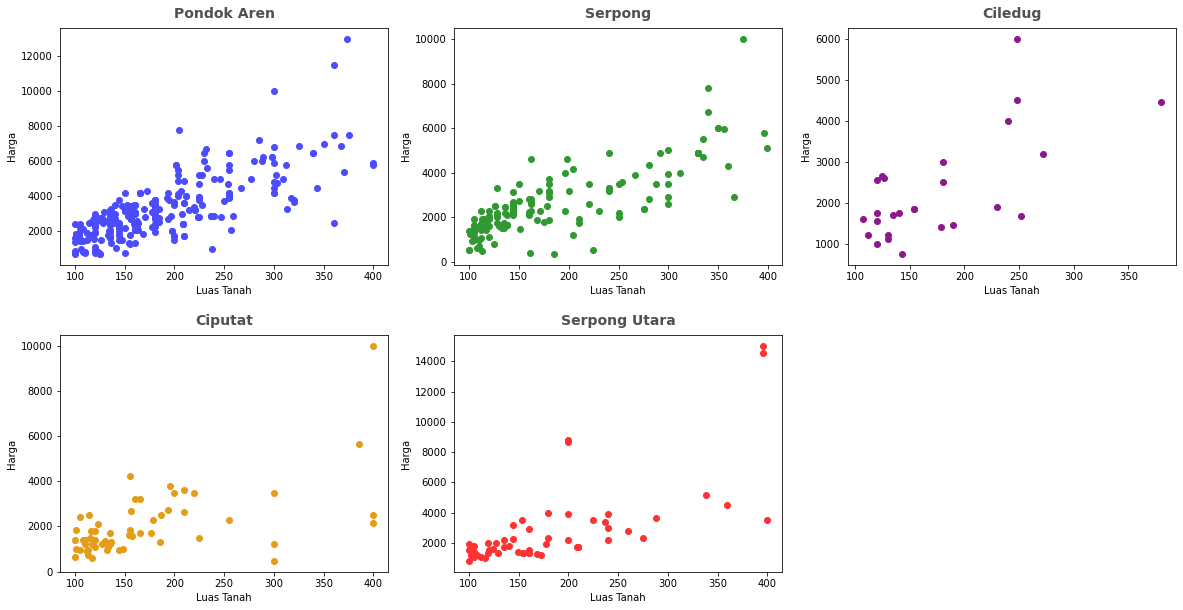

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.set_figwidth(20)
fig.set_figheight(10)
fig.subplots_adjust(hspace=0.3)
nrows = 2
ncols = 3
fig.delaxes(ax[1,2])
color_index = 0
colors = ['#4c4cff', '#e59c16', '#329932', '#ff3232', '#8c198c']
titles = [x for x in df['Lokasi'].unique()]


for num, lok in enumerate(df['Lokasi'].unique()):
    row = num // nrows
    column = num % nrows
    df_aktif = df[df['Lokasi'] == lok]
    ax[column, row].scatter(df_aktif['Luas Tanah'], df_aktif['Harga'], color=colors[color_index])
    ax[column, row].set_xlabel('Luas Tanah')
    ax[column, row].set_ylabel('Harga')
    ax[column, row].set_title(titles[color_index], pad=10, fontsize=14, fontweight='bold', color='#515151')
    color_index += 1
    
    
# plt.savefig('harga_LT_pisah.png', dpi=600, facecolor='white', bbox_inches='tight')

Make House Price to Land Area Ratio Columns and Put it into new Data Frame (Sort by Lowest)

In [38]:
df['Rasio HLT'] = df['Harga']/df['Luas Tanah']
tanah_termurah = df.sort_values(by=['Rasio HLT'], ignore_index=True)[['ID','Harga','Luas Tanah','Rasio HLT', 'Lokasi',]].rename(columns={'Rasio HLT':'Harga Per Meter'})

tanah_termurah.head(4)

,ID,Harga,Luas Tanah,Harga Per Meter,Lokasi
0,813200116,465,300,1.550000,Ciputat
1,813077829,360,185,1.945946,Serpong
2,813171645,531,224,2.370536,Serpong
3,812810948,400,161,2.484472,Serpong


Get Mean, Median Mode and Standard Deviation of House Price to Land Area Ratio

In [39]:
print('Mean: ', df['Rasio HLT'].mean())
print('Median: ', df['Rasio HLT'].median())
print('Mode: ', df['Rasio HLT'].mode())
print('Standard Deviation: ', df['Rasio HLT'].std())

Mean:  15.655071248456489
Median:  15.36774628879892
Mode:  0    16.666667
1    19.444444
dtype: float64
Standard Deviation:  5.865195087148331


#### House Price to Building Area Ratio

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


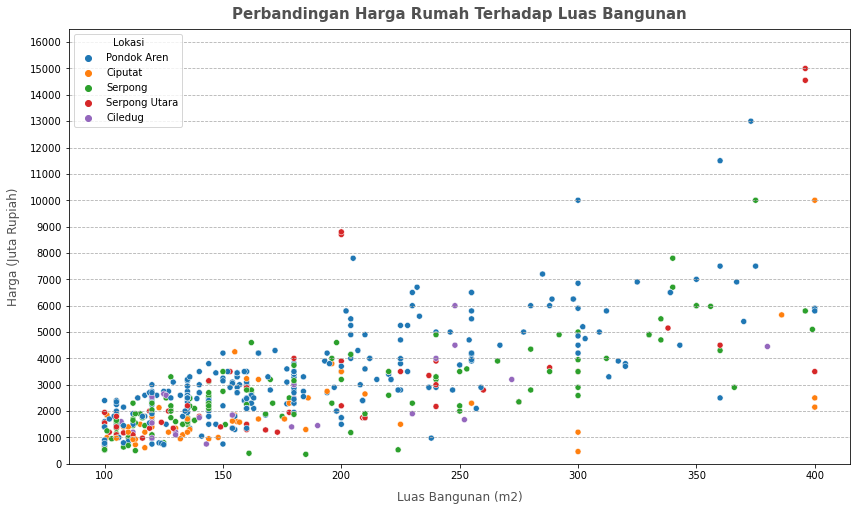

In [40]:
fig = plt.figure(figsize = [14,8])
sns.scatterplot(df['Luas Tanah'], df['Harga'], hue=df['Lokasi'])
plt.title('Perbandingan Harga Rumah Terhadap Luas Bangunan', {'fontsize': 15, 'fontweight':'bold'}, pad=10, color='#515151')
plt.ylabel('Harga (Juta Rupiah)', {'fontsize': 12}, labelpad=10, color='#515151')
plt.xlabel('Luas Bangunan (m2)', {'fontsize': 12}, labelpad=10, color='#515151')
plt.yticks([x*1000 for x in range(0,17)])
plt.ylim([0,16500])
plt.grid(axis='y', linestyle='--')

# plt.savefig('harga_LB.png', dpi=600, facecolor='white', bbox_inches='tight')

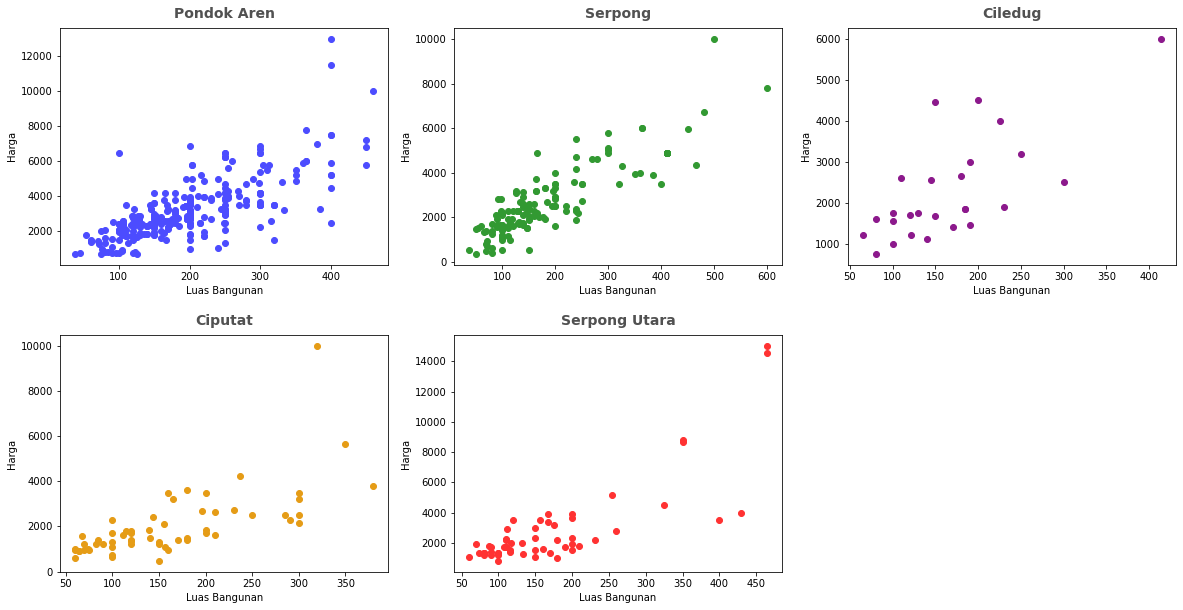

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.set_figwidth(20)
fig.set_figheight(10)
fig.subplots_adjust(hspace=0.3)
nrows = 2
ncols = 3
fig.delaxes(ax[1,2])
color_index = 0
colors = ['#4c4cff', '#e59c16', '#329932', '#ff3232', '#8c198c']
titles = [x for x in df['Lokasi'].unique()]


for num, lok in enumerate(df['Lokasi'].unique()):
    row = num // nrows
    column = num % nrows
    df_aktif = df[df['Lokasi'] == lok]
    ax[column, row].scatter(df_aktif['Luas Bangunan'], df_aktif['Harga'], color=colors[color_index])
    ax[column, row].set_xlabel('Luas Bangunan')
    ax[column, row].set_ylabel('Harga')
    ax[column, row].set_title(titles[color_index], pad=10, fontsize=14, fontweight='bold', color='#515151')
    color_index += 1
    
    
# plt.savefig('harga_LB_pisah.png', dpi=600, facecolor='white', bbox_inches='tight')

Make House Price to Building Area Ratio Columns and Put it into new Data Frame (Sort by Lowest)

In [42]:
df['Rasio HLB'] = df['Harga']/df['Luas Bangunan']
bangunan_termurah = df.sort_values(by=['Rasio HLB'], ignore_index=True)[['ID', 'Harga', 'Luas Bangunan', 'Rasio HLB', 'Lokasi']].rename(columns={'Rasio HLB':'Harga Per Meter Bangunan'})

bangunan_termurah.head(4)

,ID,Harga,Luas Bangunan,Harga Per Meter Bangunan,Lokasi
0,813200116,465,150,3.1000,Ciputat
1,813171645,531,150,3.5400,Serpong
2,813356834,1050,240,4.3750,Pondok Aren
3,801477890,1500,320,4.6875,Pondok Aren


Get Mean, Median Mode and Standard Deviation of House Price to Building Area Ratio

In [43]:
print('Mean: ', df['Rasio HLB'].mean())
print('Median: ', df['Rasio HLB'].median())
print('Mode: ', df['Rasio HLB'].mode())
print('Standard Deviation: ', df['Rasio HLB'].std())

Mean:  15.942947325615963
Median:  15.5
Mode:  0    15.0
dtype: float64
Standard Deviation:  5.8005568181353375


#### Adding Labels for Global Deals

Defining Threshold for House Price to Building Area Ratio

In [44]:
th_bargain_bawah = (df['Rasio HLB'].mean()-(df['Rasio HLB'].std()*0.9))
th_bargain_atas = (df['Rasio HLB'].mean()-(df['Rasio HLB'].std()*0.20))
th_mahal_bawah = (df['Rasio HLB'].mean()+(df['Rasio HLB'].std()*0.20))
th_mahal_atas = (df['Rasio HLB'].mean()+(df['Rasio HLB'].std()*0.9))

def bargain_global(x):
    if x < th_bargain_bawah:
        return 'Suspicious'
    elif x < th_bargain_atas:
        return 'Bargain'
    elif x > th_mahal_atas:
        return 'Very Expensive'
    elif x > th_mahal_bawah:
        return 'Expensive'
    else:
        return 'Normal'

In [45]:
df['Deals'] = df['Rasio HLB'].apply(bargain_global)

df[['Lokasi', 'Rasio HLB', 'Deals']].head(3)

,Lokasi,Rasio HLB,Deals
0,Pondok Aren,33.333333,Very Expensive
1,Pondok Aren,24.000000,Very Expensive
2,Ciputat,16.650000,Normal


#### Adding Labels for Local Deals

In [46]:
list_lokasi = df['Lokasi'].unique()
loc_mean = {a : (df[df['Lokasi'] == a]['Rasio HLB'].mean()) for a in list_lokasi}

loc_mean

{'Pondok Aren': 16.906257101877728,
 'Ciputat': 12.889527612026527,
 'Serpong': 15.464757737349673,
 'Serpong Utara': 16.038126767800453,
 'Ciledug': 14.181256224982858}

In [47]:
loc_stdev = {a : (df[df['Lokasi'] == a]['Rasio HLB'].std()) for a in list_lokasi}
loc_stdev

{'Pondok Aren': 5.958965807782663,
 'Ciputat': 5.021104034546468,
 'Serpong': 5.0383107475745685,
 'Serpong Utara': 6.370058403091777,
 'Ciledug': 5.600537637049517}

In [48]:
grand_list = []
for a in list_lokasi:
    grand_list.append([loc_mean[a]-loc_stdev[a]*0.9, 
                       loc_mean[a]-loc_stdev[a]*0.2, 
                       loc_mean[a]+ loc_stdev[a]*0.2, 
                       loc_mean[a]+loc_stdev[a]*0.9])
    
local_dict = {key:value for key,value in zip(list_lokasi, grand_list)}

local_dict

{'Pondok Aren': [11.54318787487333,
  15.714463940321195,
  18.09805026343426,
  22.269326328882123],
 'Ciputat': [8.370533980934706,
  11.885306805117233,
  13.89374841893582,
  17.408521243118347],
 'Serpong': [10.930278064532562,
  14.45709558783476,
  16.472419886864586,
  19.999237410166785],
 'Serpong Utara': [10.305074205017853,
  14.764115087182097,
  17.312138448418807,
  21.771179330583053],
 'Ciledug': [9.140772351638294,
  13.061148697572955,
  15.301363752392762,
  19.221740098327423]}

In [49]:
def bargain_local(lok, hlb):
    if hlb < local_dict[lok][0]:
        return 'Suspicious'
    elif hlb < local_dict[lok][1]:
        return 'Bargain'
    elif hlb > local_dict[lok][3]:
        return 'Very Expensive'
    elif hlb > local_dict[lok][2]:
        return 'Expensive'
    else:
        return 'Normal'

In [50]:
dfla = []
for a,b in zip(df['Lokasi'],df['Rasio HLB']):
    dfla.append(bargain_local(a,b))

df['Lokal Deals'] = dfla
df[['Lokasi', 'Rasio HLB', 'Lokal Deals']].head(3)

,Lokasi,Rasio HLB,Lokal Deals
0,Pondok Aren,33.333333,Very Expensive
1,Pondok Aren,24.000000,Very Expensive
2,Ciputat,16.650000,Expensive


#### Manage Data Based on Deals and Local Deals

Sorting Based on Price Per Square Meter Building

In [51]:
df_withdeals = df.sort_values(by=['Rasio HLB'], ignore_index=True)[['ID', 'Harga', 'Luas Bangunan', 'Lokasi', 'Rasio HLB', 
                                                                    'Deals', 'Lokal Deals' ]].rename(columns={'Rasio HLB':'Harga Per Meter Bangunan'})

df_withdeals.head(5)

,ID,Harga,Luas Bangunan,Lokasi,Harga Per Meter Bangunan,Deals,Lokal Deals
0,813200116,465,150,Ciputat,3.1000,Suspicious,Suspicious
1,813171645,531,150,Serpong,3.5400,Suspicious,Suspicious
2,813356834,1050,240,Pondok Aren,4.3750,Suspicious,Suspicious
3,801477890,1500,320,Pondok Aren,4.6875,Suspicious,Suspicious
4,813078646,975,200,Pondok Aren,4.8750,Suspicious,Suspicious


Distribution of Global Deals Category Per District

In [52]:
dfvc = df_withdeals[['Lokasi', 'Deals']].value_counts(sort=False)
dfvc = dfvc.unstack()
cols = ['Suspicious', 'Bargain', 'Normal', 'Expensive', 'Very Expensive']

dfvc = dfvc[cols]
dfvc

Deals,Suspicious,Bargain,Normal,Expensive,Very Expensive
Lokasi,,,,,
Ciledug,10,6,2,5,3
Ciputat,22,20,8,5,4
Pondok Aren,31,75,67,70,59
Serpong,22,51,23,33,18
Serpong Utara,14,10,11,12,9


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Ciledug'),
  Text(1, 0, 'Ciputat'),
  Text(2, 0, 'Pondok Aren'),
  Text(3, 0, 'Serpong'),
  Text(4, 0, 'Serpong Utara')])

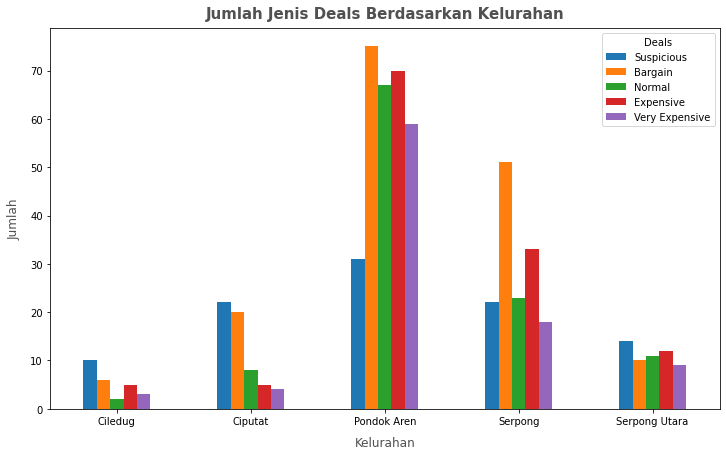

In [53]:
dfvc.plot(kind='bar', figsize=[12,7])
plt.title('Jumlah Jenis Deals Berdasarkan Kelurahan', {'fontsize': 15, 'fontweight':'bold'}, pad=10, color='#515151')
plt.ylabel('Jumlah', {'fontsize': 12}, labelpad=10, color='#515151')
plt.xlabel('Kelurahan', {'fontsize': 12}, labelpad=10, color='#515151')
plt.xticks(rotation=0)
# plt.savefig('global_deals.png', dpi=600, facecolor='white', bbox_inches='tight')

Distribution of Local Deals Category Per District

In [54]:
dfvc_local = df_withdeals[['Lokasi', 'Lokal Deals']].value_counts(sort=False)
dfvc_local = dfvc_local.unstack()
dfvc_local = dfvc_local[cols]
dfvc_local

Lokal Deals,Suspicious,Bargain,Normal,Expensive,Very Expensive
Lokasi,,,,,
Ciledug,5,7,4,6,4
Ciputat,13,14,10,14,8
Pondok Aren,38,99,61,51,53
Serpong,23,43,21,35,25
Serpong Utara,13,11,11,12,9


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Ciledug'),
  Text(1, 0, 'Ciputat'),
  Text(2, 0, 'Pondok Aren'),
  Text(3, 0, 'Serpong'),
  Text(4, 0, 'Serpong Utara')])

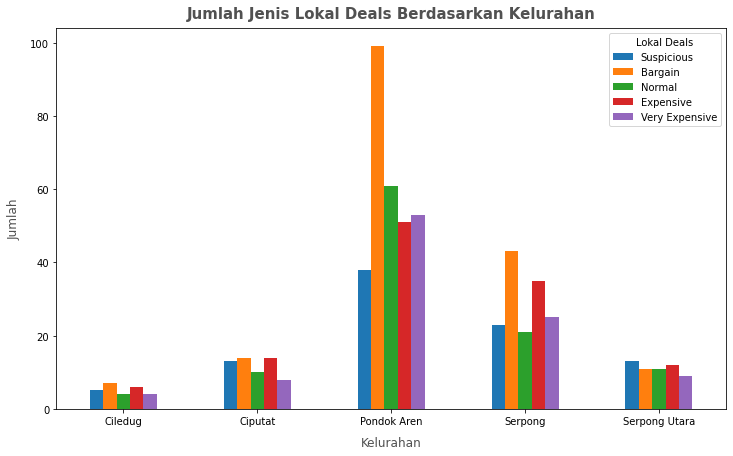

In [55]:
dfvc_local.plot(kind='bar', figsize=[12,7])
plt.title('Jumlah Jenis Lokal Deals Berdasarkan Kelurahan', {'fontsize': 15, 'fontweight':'bold'}, pad=10, color='#515151')
plt.ylabel('Jumlah', {'fontsize': 12}, labelpad=10, color='#515151')
plt.xlabel('Kelurahan', {'fontsize': 12}, labelpad=10, color='#515151')
plt.xticks(rotation=0)
# plt.savefig('local_deals.png', dpi=600, facecolor='white', bbox_inches='tight')

Get Rid of Suspicious Deals on Local and Global Deals

In [56]:
df_withdeals_nosus = df_withdeals[df_withdeals['Deals'] != 'Suspicious']
df_withdeals_nosus = df_withdeals_nosus[df_withdeals['Lokal Deals'] != 'Suspicious']
df_withdeals_nosus = df_withdeals_nosus.reset_index(drop=True)

df_withdeals_nosus.sort_values(by=['Deals', 'Lokal Deals']).head(5)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ID,Harga,Luas Bangunan,Lokasi,Harga Per Meter Bangunan,Deals,Lokal Deals
0,801258125,3230,300,Ciputat,10.766667,Bargain,Bargain
1,813328244,2800,260,Serpong Utara,10.769231,Bargain,Bargain
2,813123597,3500,320,Serpong,10.937500,Bargain,Bargain
3,812854603,1100,100,Serpong,11.000000,Bargain,Bargain
4,813454395,2750,250,Serpong,11.000000,Bargain,Bargain


Filter to Only 'Bargain' Deals both on Global and Local Deals

In [57]:
double_bargain = df_withdeals_nosus[df_withdeals_nosus['Deals'] == 'Bargain' ]
double_bargain = double_bargain[double_bargain['Lokal Deals'] == 'Bargain']
double_bargain.iloc[:, 1:].describe()

,Harga,Luas Bangunan,Harga Per Meter Bangunan
count,128.000000,128.000000,128.000000
mean,2843.507812,222.234375,12.806507
std,1318.638065,102.133654,0.987510
min,800.000000,70.000000,10.766667
25%,1850.000000,147.500000,11.951220
50%,2609.500000,200.000000,12.909962
75%,3500.000000,300.000000,13.675926
max,7800.000000,600.000000,14.750000


Limit the Price Up to 1.8 Billion as Final Result 

In [58]:
double_bargain1800 = double_bargain[double_bargain['Harga'] <= 1800].reset_index(drop=True)

double_bargain1800

,ID,Harga,Luas Bangunan,Lokasi,Harga Per Meter Bangunan,Deals,Lokal Deals
0,812854603,1100,100,Serpong,11.000000,Bargain,Bargain
1,812940360,1100,100,Ciputat,11.000000,Bargain,Bargain
2,762259621,1675,150,Ciledug,11.166667,Bargain,Bargain
3,802787207,1350,120,Ciputat,11.250000,Bargain,Bargain
4,800719334,800,70,Serpong,11.428571,Bargain,Bargain
5,813060812,1400,120,Ciputat,11.666667,Bargain,Bargain
6,800199499,1650,140,Serpong,11.785714,Bargain,Bargain
7,813470214,1185,100,Serpong,11.850000,Bargain,Bargain
8,813203903,1350,113,Pondok Aren,11.946903,Bargain,Bargain
9,812829094,1800,150,Pondok Aren,12.000000,Bargain,Bargain
